In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as img
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

In [15]:
IMG_SIZE = (88, 126)
def load_image_vector(path):
    image =  Image.open(path).convert('L').resize(IMG_SIZE) # Image to grayscale
    matrix = np.array(image).astype(int)
    print(matrix.shape)
    column_vector = matrix.flatten()
    return column_vector

def load_images(path):
    images = []
    for fname in os.listdir(path):
        images.append(load_image_vector('/'.join([path, fname])))
        print(fname)
    return np.array(images)

def compute_mean_vector(vectors):
    return sum(vectors)/len(vectors)

def vec_to_img(vec):
    return Image.fromarray(np.reshape(vec, (126, 88))).convert('RGB')

In [16]:
photos_path = './data/train'

In [17]:
image_vectors = load_images(photos_path)

(126, 88)
Sasha.jpeg
(126, 88)
1.jpg
(126, 88)
чб 126-88.jpg
(126, 88)
Linara.jpg
(126, 88)
2.jpg


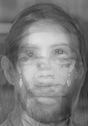

In [18]:
mean_face = compute_mean_vector(image_vectors)
mean_face_matrix = np.reshape(mean_face, (126, 88))
mean_face_image = Image.fromarray(mean_face_matrix).convert('RGB')
mean_face_image

In [19]:
residual_vectors = np.array([f - mean_face for f in image_vectors]).T
rank = np.linalg.matrix_rank(residual_vectors)
residual_vectors.shape, rank

((11088, 5), 4)

In [20]:
u, s, vh = np.linalg.svd(residual_vectors, full_matrices=True)
face_basis = u
face_basis

array([[-1.55945629e-02,  1.30244149e-03,  1.15842874e-02, ...,
        -8.79928172e-03, -4.68264189e-03, -5.20930356e-03],
       [-1.55780109e-02,  9.82844870e-04,  1.08292837e-02, ...,
         7.96636022e-03,  6.58740348e-03,  3.72753515e-03],
       [-1.59447061e-02, -2.62199967e-04,  6.44932288e-03, ...,
        -2.77776535e-03,  1.53020171e-03, -2.44398076e-03],
       ...,
       [ 3.27243603e-03,  1.01666269e-02, -1.25023381e-02, ...,
         9.99535082e-01, -4.50002944e-04, -3.64850054e-04],
       [ 8.75768432e-03,  6.32808519e-03, -1.18082420e-02, ...,
        -4.26859645e-04,  9.99545789e-01, -3.49746061e-04],
       [ 7.91690942e-03,  4.77560548e-03, -1.00814879e-02, ...,
        -3.50485877e-04, -3.80128541e-04,  9.99675430e-01]])

In [32]:
print('Base faces')
vec_to_img(vh[1)

Base faces


ValueError: cannot reshape array of size 5 into shape (126,88)

In [47]:
def scalar_projection(vector, mean_vector, basis):
    return basis.T.dot((vector - mean_vector))

In [48]:
train_projections = np.array([scalar_projection(im, mean_face, face_basis) for im in residual_vectors.T])
train_projections.shape

(2, 11088)

In [49]:
test_faces_path = './data/test'
test_face = load_image_vector(f'{test_faces_path}/1.jpg')
test_face.shape

(126, 88)


(11088,)

In [50]:
test_face_projection = scalar_projection(test_face, mean_face, face_basis)
test_face_projection.shape

(11088,)

In [51]:
def norm_2(v1, v2):
    return np.sqrt((v1-v2).T.dot(v1-v2))

def distance_from_face_space(v1, mean_face, basis):
    fp = basis.dot(v1)
    return norm_2(v1-mean_face, fp)
    
def distance_in_face_space(v1, v2):
    return norm_2(v1, v2)
    

In [53]:
print('Distance from face space', distance_from_face_space(test_face_projection, mean_face, face_basis))
for i, im in enumerate(train_projections):
    prj = scalar_projection(im, mean_face, face_basis)
    print(i, distance_in_face_space(im, prj))

Distance from face space 14642.3828038537
0 12906.005322389889
1 18374.761280345043
